In [34]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import re

In [35]:
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth',None)
pd.set_option("display.max_columns", None)

In [173]:
df=pd.read_csv(r'dataset/clean_combo.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [174]:
df.head()

,property_type,sector_info,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,ind. house,sector 24,dlf city plots phase 3,5.00,34083.0,1467.00,Plot area 163(136.29 sq.m.),13.0,13.0,3+,Pooja Room,4.0,North,0 to 1 Year Old,"['Dlf phase 3 metro station', 'Micromax moulsari avenue metro station', 'Dlf phase 2 metro station', 'Guru dronacharya metro station', 'Indusind bank cyber city metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Icici bank ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Dental Cure and Care Centre', ""Dr. Khullar's Dental Clinic"", 'Garg Dental Care', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Dental Harbour', 'Upkar Clinic', 'Asha Multispeciality Clinic', ""St Stephen's Hospital Health Care Facility"", 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Cosmodentz Dental Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Krishna Family Clinic', 'Durga Poly Clinic', 'Anahat Hospital', 'Pharmacy', 'Shri Balaji Medical Store', 'State bank of india', 'Icici bank', 'Deutsche bank', 'Standard chartered bank', 'PVR Cinames', 'The God Father', 'Machaan', 'Food Court', 'Mc Donalds', 'barrique', ""McDonald's""]","['1 Water Purifier', '1 Fridge', '21 Fan', '1 Exhaust Fan', '1 Dining Table', '13 Geyser', '1 Stove', '20 Light', '1 Chimney', '9 TV', '18 AC', '1 Modular Kitchen', '1 Curtains', '7 Wardrobe', '14 Bed', '1 Sofa', '1 Microwave', '1 Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Bank Attached Property', 'Visitor Parking', 'Security Personnel', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1,ind. house,sector 105,rajendra park gurgaon,0.37,10277.0,360.00,Plot area 360(33.45 sq.m.),4.0,3.0,2,not available,3.0,East,1 to 5 Year Old,"['Palam Vihar Vyapar kendra', 'Chintapurni Mandir', 'State bank ATM', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Bhardwaj Hospital', 'Dr. Hitesh Dawar', 'Jiya Clinic', 'Sneh Hospital Gurgaon', 'Dr. Mittal Clinic', 'Kalyan Hospital Gurgaon', ""Dr. Anurag's Child Care Clinic"", 'Prateek Nursing Home And Polyclinic', 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Kr Dental Hub', 'Shree Krishna Hospital Gurgaon', 'Gurgaon Eye Centre', 'Dr. Ashok Jain', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']",[],NaN
2,flat,sector 12,ss residency,0.53,4818.0,1100.04,Super Built up area 1100(102.19 sq.m.),3.0,3.0,2,not available,2.0,NaN,1 to 5 Year Old,"['Hanuman Mandir', 'State bank of india ATM', 'Hdfc bank ATM', 'Dr. Sandeep Chauhan', 'Ahooja Eye and Dental Institute Hospital', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Dental Health Centre', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Sharma Hospital Gurgaon', 'Gupta Hospital Gurgaon', 'Lall Nursing and Maternity Home', 'Om Charitable Dental & Implant Centre', 'Lall Eye Care Centre', 'M Goel Hospital', 'Lotus Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'Kharbanda Maternity and Nursing Home', 'Mamta Hospital Gurgaon', 'Lalit Dental Care', 'Jackson Hospital', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Saraswati Hospital Gurgaon', 'Aarvy Hospital', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Sarvejeet Singh', 'Dayal Eye & Maternity Centre', 'Triveni Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Kalyani Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Bindal Clinic', 'Ahmed Hospital Multi Speciality', 'Nidhi Clinic', 'Dr. Agya Ram Shar

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3796 non-null   object 
 1   sector_info      3796 non-null   object 
 2   society          3241 non-null   object 
 3   price            3795 non-null   float64
 4   price_per_sqft   3795 non-null   float64
 5   area             3795 non-null   float64
 6   areaWithType     3796 non-null   object 
 7   bedRoom          3796 non-null   float64
 8   bathroom         3796 non-null   float64
 9   balcony          3796 non-null   object 
 10  additionalRoom   3796 non-null   object 
 11  floorNum         3772 non-null   float64
 12  facing           2700 non-null   object 
 13  agePossession    3795 non-null   object 
 14  nearbyLocations  3608 non-null   object 
 15  furnishDetails   2810 non-null   object 
 16  features         3140 non-null   object 
dtypes: float64(6),

In [179]:
def find_sector(a):
    pattern = r'sector[\s-]*(\d+[a-zA-Z]*)'
    matches = re.findall(pattern, a)
    return ", ".join(['sector ' + match for match in matches])


In [180]:
df['sector_info']=df['sector_info'].apply(find_sector)

In [181]:
df.insert(column='carpet_area',loc=7,value=np.nan)
df.insert(column='built_up_area',loc=8,value=np.nan)
df.insert(column='super_built_area',loc=9,value=np.nan)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_type     3796 non-null   object 
 1   sector_info       3796 non-null   object 
 2   society           3241 non-null   object 
 3   price             3795 non-null   float64
 4   price_per_sqft    3795 non-null   float64
 5   area              3795 non-null   float64
 6   areaWithType      3796 non-null   object 
 7   carpet_area       0 non-null      float64
 8   built_up_area     0 non-null      float64
 9   super_built_area  0 non-null      float64
 10  bedRoom           3796 non-null   float64
 11  bathroom          3796 non-null   float64
 12  balcony           3796 non-null   object 
 13  additionalRoom    3796 non-null   object 
 14  floorNum          3772 non-null   float64
 15  facing            2700 non-null   object 
 16  agePossession     3795 non-null   object 


In [183]:
df['areaWithType_dummy']=df['areaWithType'].str.replace('(',' ').str.replace(')',' ').str.replace('sq.ft.','').str.replace('sq.yards','')

C:\Users\kapil\AppData\Local\Temp\ipykernel_17428\1427121689.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['areaWithType_dummy']=df['areaWithType'].str.replace('(',' ').str.replace(')',' ').str.replace('sq.ft.','').str.replace('sq.yards','')
C:\Users\kapil\AppData\Local\Temp\ipykernel_17428\1427121689.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['areaWithType_dummy']=df['areaWithType'].str.replace('(',' ').str.replace(')',' ').str.replace('sq.ft.','').str.replace('sq.yards','')


In [184]:
df.head()

,property_type,sector_info,society,price,price_per_sqft,area,areaWithType,carpet_area,built_up_area,super_built_area,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,areaWithType_dummy
0,ind. house,sector 24,dlf city plots phase 3,5.00,34083.0,1467.00,Plot area 163(136.29 sq.m.),NaN,NaN,NaN,13.0,13.0,3+,Pooja Room,4.0,North,0 to 1 Year Old,"['Dlf phase 3 metro station', 'Micromax moulsari avenue metro station', 'Dlf phase 2 metro station', 'Guru dronacharya metro station', 'Indusind bank cyber city metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Icici bank ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Dental Cure and Care Centre', ""Dr. Khullar's Dental Clinic"", 'Garg Dental Care', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Dental Harbour', 'Upkar Clinic', 'Asha Multispeciality Clinic', ""St Stephen's Hospital Health Care Facility"", 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Cosmodentz Dental Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Krishna Family Clinic', 'Durga Poly Clinic', 'Anahat Hospital', 'Pharmacy', 'Shri Balaji Medical Store', 'State bank of india', 'Icici bank', 'Deutsche bank', 'Standard chartered bank', 'PVR Cinames', 'The God Father', 'Machaan', 'Food Court', 'Mc Donalds', 'barrique', ""McDonald's""]","['1 Water Purifier', '1 Fridge', '21 Fan', '1 Exhaust Fan', '1 Dining Table', '13 Geyser', '1 Stove', '20 Light', '1 Chimney', '9 TV', '18 AC', '1 Modular Kitchen', '1 Curtains', '7 Wardrobe', '14 Bed', '1 Sofa', '1 Microwave', '1 Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Bank Attached Property', 'Visitor Parking', 'Security Personnel', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",Plot area 163 136.29 sq.m.
1,ind. house,sector 105,rajendra park gurgaon,0.37,10277.0,360.00,Plot area 360(33.45 sq.m.),NaN,NaN,NaN,4.0,3.0,2,not available,3.0,East,1 to 5 Year Old,"['Palam Vihar Vyapar kendra', 'Chintapurni Mandir', 'State bank ATM', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Bhardwaj Hospital', 'Dr. Hitesh Dawar', 'Jiya Clinic', 'Sneh Hospital Gurgaon', 'Dr. Mittal Clinic', 'Kalyan Hospital Gurgaon', ""Dr. Anurag's Child Care Clinic"", 'Prateek Nursing Home And Polyclinic', 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Kr Dental Hub', 'Shree Krishna Hospital Gurgaon', 'Gurgaon Eye Centre', 'Dr. Ashok Jain', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']",[],NaN,Plot area 360 33.45 sq.m.
2,flat,sector 12,ss residency,0.53,4818.0,1100.04,Super Built up area 1100(102.19 sq.m.),NaN,NaN,NaN,3.0,3.0,2,not available,2.0,NaN,1 to 5 Year Old,"['Hanuman Mandir', 'State bank of india ATM', 'Hdfc bank ATM', 'Dr. Sandeep Chauhan', 'Ahooja Eye and Dental Institute Hospital', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Dental Health Centre', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Sharma Hospital Gurgaon', 'Gupta Hospital Gurgaon', 'Lall Nursing and Maternity Home', 'Om Charitable Dental & Implant Centre', 'Lall Eye Care Centre', 'M Goel Hospital', 'Lotus Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'Kharbanda Maternity and Nursing Home', 'Mamta Hospital Gurgaon', 'Lalit Dental Care', 'Jackson Hospital', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Saraswati Hospital Gurgaon', 'Aarvy Hospital', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Sarvejeet Singh', 'Dayal Eye & Maternity Centre', 'Triveni Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home

In [185]:
def super_area(text):
    match=re.search(r'Super Built up area\s\d*\s(\d+\.?\d*)',text)
    if match:
        return round(float(match.group(1))*10.7639,0)
    return None

In [186]:
df['super_built_area']=df['areaWithType_dummy'].apply(super_area)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_type       3796 non-null   object 
 1   sector_info         3796 non-null   object 
 2   society             3241 non-null   object 
 3   price               3795 non-null   float64
 4   price_per_sqft      3795 non-null   float64
 5   area                3795 non-null   float64
 6   areaWithType        3796 non-null   object 
 7   carpet_area         0 non-null      float64
 8   built_up_area       0 non-null      float64
 9   super_built_area    1869 non-null   float64
 10  bedRoom             3796 non-null   float64
 11  bathroom            3796 non-null   float64
 12  balcony             3796 non-null   object 
 13  additionalRoom      3796 non-null   object 
 14  floorNum            3772 non-null   float64
 15  facing              2700 non-null   object 
 16  agePos

In [188]:
df['areaWithType_dummy']

0                                                                                            Plot area 163 136.29 sq.m. 
1                                                                                             Plot area 360 33.45 sq.m. 
2                                                                                 Super Built up area 1100 102.19 sq.m. 
3                                                 Super Built up area 1745 162.12 sq.m. Built Up area: 1550   144 sq.m. 
4                                                                                 Super Built up area 2358 219.07 sq.m. 
5                                                                                     Built Up area: 2680  248.98 sq.m. 
6                                                                                            Plot area 360 301.01 sq.m. 
7             Super Built up area 2150 199.74 sq.m. Built Up area: 1797   166.95 sq.m. Carpet area: 1660   154.22 sq.m. 
8                               

In [193]:
def get_area(text,area_type):
    match=re.search(area_type+r'\s*:\s*\d+\.?\d*\s*(\d+\.?\d*)',text)
    if match:
        return round(float(match.group(1))*10.7639,0)
    return None

In [196]:
df['built_up_area']=df['areaWithType_dummy'].apply(lambda x:get_area(x,'Built Up area'))
df['carpet_area']=df['areaWithType_dummy'].apply(lambda x:get_area(x,'Carpet area'))

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_type       3796 non-null   object 
 1   sector_info         3796 non-null   object 
 2   society             3241 non-null   object 
 3   price               3795 non-null   float64
 4   price_per_sqft      3795 non-null   float64
 5   area                3795 non-null   float64
 6   areaWithType        3796 non-null   object 
 7   carpet_area         1923 non-null   float64
 8   built_up_area       1180 non-null   float64
 9   super_built_area    1869 non-null   float64
 10  bedRoom             3796 non-null   float64
 11  bathroom            3796 non-null   float64
 12  balcony             3796 non-null   object 
 13  additionalRoom      3796 non-null   object 
 14  floorNum            3772 non-null   float64
 15  facing              2700 non-null   object 
 16  agePos

In [202]:
def plot_area(text):
    match=re.search('Plot area\s*\d+\.?\d*\s(\d+\.?\d*)',text)
    if match:
        return round(float(match.group(1))*10.7639,0)
    return None

In [201]:
df['areaWithType_dummy']

0                                                                                            Plot area 163 136.29 sq.m. 
1                                                                                             Plot area 360 33.45 sq.m. 
2                                                                                 Super Built up area 1100 102.19 sq.m. 
3                                                 Super Built up area 1745 162.12 sq.m. Built Up area: 1550   144 sq.m. 
4                                                                                 Super Built up area 2358 219.07 sq.m. 
5                                                                                     Built Up area: 2680  248.98 sq.m. 
6                                                                                            Plot area 360 301.01 sq.m. 
7             Super Built up area 2150 199.74 sq.m. Built Up area: 1797   166.95 sq.m. Carpet area: 1660   154.22 sq.m. 
8                               

In [203]:
plot_index=df[df['areaWithType'].str.contains('Plot area')]['areaWithType'].index

In [206]:
df.iloc[plot_index,8]=df[df['areaWithType'].str.contains('Plot area')]['areaWithType_dummy'].apply(plot_area)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_type       3796 non-null   object 
 1   sector_info         3796 non-null   object 
 2   society             3241 non-null   object 
 3   price               3795 non-null   float64
 4   price_per_sqft      3795 non-null   float64
 5   area                3795 non-null   float64
 6   areaWithType        3796 non-null   object 
 7   carpet_area         1923 non-null   float64
 8   built_up_area       1778 non-null   float64
 9   super_built_area    1869 non-null   float64
 10  bedRoom             3796 non-null   float64
 11  bathroom            3796 non-null   float64
 12  balcony             3796 non-null   object 
 13  additionalRoom      3796 non-null   object 
 14  floorNum            3772 non-null   float64
 15  facing              2700 non-null   object 
 16  agePos

In [208]:
df['additionalRoom']=df['additionalRoom'].str.lower()

In [209]:
column=['study room','store room','pooja room','others','servant room']

for i in column:
    df[i]=df['additionalRoom'].str.contains(i).astype(int)

In [210]:
df.drop('additionalRoom',axis=1,inplace=True)

In [211]:
def age_poss(value):
    if pd.isna(value) or value == 'undefined':
        return 'undefined'
    elif value in ['0 to 1 Year Old','Within 6 months','Within 3 months']:
        return 'New Property'
    elif value in '1 to 5 Year Old':
        return 'Relatively New'
    elif value in '5 to 10 Year Old':
        return 'Moderately old'
    elif value in '10+ Year Old':
        return 'old Property'
    else:
        return 'Under construction'

In [212]:
df['agePossession']=df['agePossession'].apply(age_poss)

In [213]:
df.shape

(3796, 25)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_type       3796 non-null   object 
 1   sector_info         3796 non-null   object 
 2   society             3241 non-null   object 
 3   price               3795 non-null   float64
 4   price_per_sqft      3795 non-null   float64
 5   area                3795 non-null   float64
 6   areaWithType        3796 non-null   object 
 7   carpet_area         1923 non-null   float64
 8   built_up_area       1778 non-null   float64
 9   super_built_area    1869 non-null   float64
 10  bedRoom             3796 non-null   float64
 11  bathroom            3796 non-null   float64
 12  balcony             3796 non-null   object 
 13  floorNum            3772 non-null   float64
 14  facing              2700 non-null   object 
 15  agePossession       3796 non-null   object 
 16  nearby

In [215]:
df.sample(2)

,property_type,sector_info,society,price,price_per_sqft,area,areaWithType,carpet_area,built_up_area,super_built_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,areaWithType_dummy,study room,store room,pooja room,others,servant room
1492,flat,sector 113,la vida by tata housing,1.9,18500.0,1027.03,Super Built up area 1579(146.69 sq.m.)Carpet area: 1027 sq.ft. (95.41 sq.m.),1027.0,NaN,1579.0,3.0,2.0,2,10.0,North-East,Relatively New,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['2 Wardrobe', '1 Water Purifier', '3 Fan', '2 Geyser', '1 Stove', '8 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",Super Built up area 1579 146.69 sq.m. Carpet area: 1027 95.41 sq.m.,0,0,1,0,0
2799,flat,sector 65,emaar mgf emerald floors premier,2.3,13939.0,1650.05,Carpet area: 1650 (153.29 sq.m.),1650.0,NaN,NaN,3.0,4.0,3,3.0,South-West,Relatively New,"['WorldMark Gurgaon', 'Sohna Road', 'Golf Course Road', 'CK Birla Hospital', 'Delhi International Airport', 'Lemon Tree Hotel']","['1 Water Purifier', '1 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Stove', '1 Light', '1 AC', '1 TV', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '1 Bed', '1 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",Carpet area: 1650 153.29 sq.m.,1,1,1,0,1


In [216]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
866,"['5 Fan', '9 Light', '1 Modular Kitchen', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
760,NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
3632,"['1 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1167,NaN,"['No open drainage around', 'Internet/wi-fi connectivity']"
2237,NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']"


In [217]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [218]:
furnishings_df.shape

(3796, 19)

In [219]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\kapil\AppData\Local\Temp\ipykernel_17428\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [220]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [221]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [222]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\clust

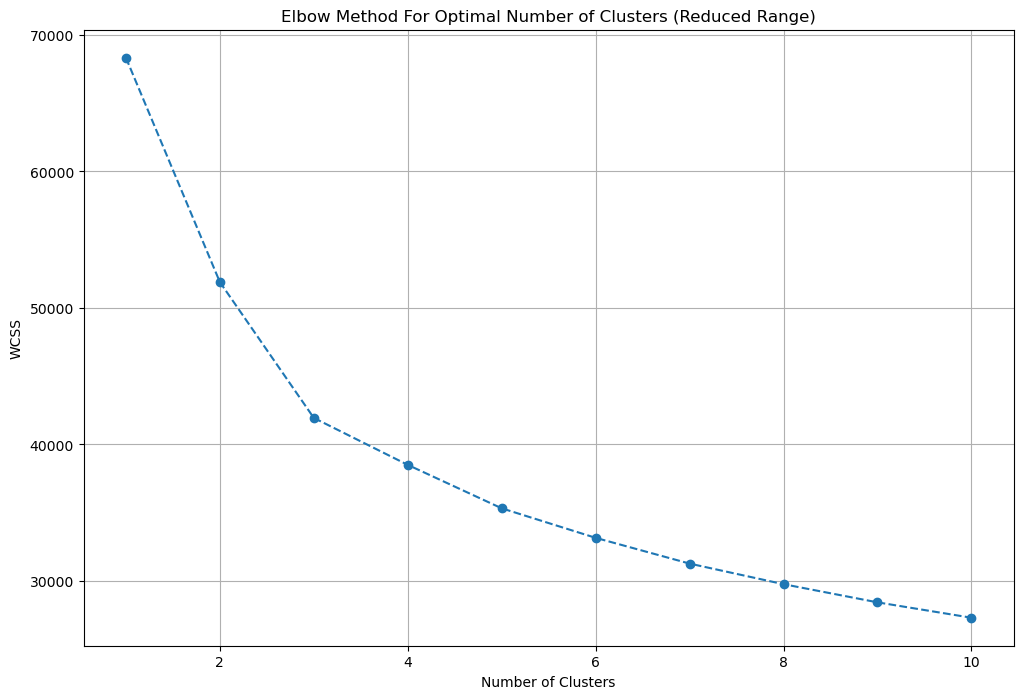

In [223]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [224]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [229]:
df=df.iloc[:,:-18]

In [230]:
df['furnishing_type'] = cluster_assignments

In [231]:
df.sample(5)[['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
3590,NaN,1
758,"['6 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '4 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
3744,[],1
1603,"['8 Fan', '1 Exhaust Fan', '3 Geyser', '12 Light', '4 TV', '1 Chimney', '5 AC', '1 Modular Kitchen', '1 Curtains', '3 Bed', '3 Wardrobe', '1 Sofa', '1 Microwave', 'No Dining Table', 'No Fridge', 'No Stove', 'No Washing Machine', 'No Water Purifier']",0
2489,"['1 Water Purifier', '5 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '12 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '5 Wardrobe', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']",2


In [233]:
df.drop('Wardrobe',axis=1,inplace=True)

In [234]:
df[['features']].sample(5)

,features
1001,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
2234,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
295,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3168,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1230,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [235]:
df['features'].isnull().sum()

656

In [238]:
app_df = pd.read_csv(r'Dataset\apartment.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [239]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [240]:
temp_df = df[df['features'].isnull()]

In [241]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [242]:
df.loc[temp_df.index,'features'] = x.values

In [243]:
df['features'].isnull().sum()

515

In [244]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [245]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [246]:
features_binary_df.head()

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [247]:
features_binary_df.shape

(3796, 130)

In [248]:

wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\clust

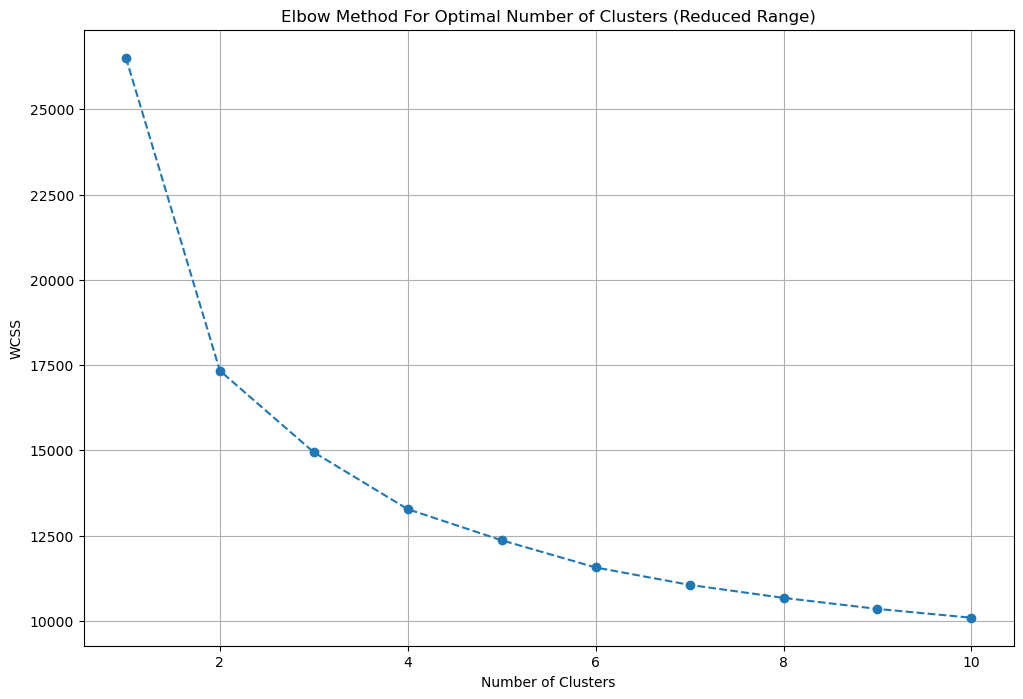

In [249]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [250]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [251]:
df['luxury_score'] = luxury_score

In [252]:

df.head()

,property_type,sector_info,society,price,price_per_sqft,area,areaWithType,carpet_area,built_up_area,super_built_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,areaWithType_dummy,study room,store room,pooja room,others,servant room,furnishing_type,features_list,luxury_score
0,ind. house,sector 24,dlf city plots phase 3,5.00,34083.0,1467.00,Plot area 163(136.29 sq.m.),NaN,1467.0,NaN,13.0,13.0,3+,4.0,North,New Property,"['Dlf phase 3 metro station', 'Micromax moulsari avenue metro station', 'Dlf phase 2 metro station', 'Guru dronacharya metro station', 'Indusind bank cyber city metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Icici bank ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Dental Cure and Care Centre', ""Dr. Khullar's Dental Clinic"", 'Garg Dental Care', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Dental Harbour', 'Upkar Clinic', 'Asha Multispeciality Clinic', ""St Stephen's Hospital Health Care Facility"", 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Cosmodentz Dental Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Krishna Family Clinic', 'Durga Poly Clinic', 'Anahat Hospital', 'Pharmacy', 'Shri Balaji Medical Store', 'State bank of india', 'Icici bank', 'Deutsche bank', 'Standard chartered bank', 'PVR Cinames', 'The God Father', 'Machaan', 'Food Court', 'Mc Donalds', 'barrique', ""McDonald's""]","['1 Water Purifier', '1 Fridge', '21 Fan', '1 Exhaust Fan', '1 Dining Table', '13 Geyser', '1 Stove', '20 Light', '1 Chimney', '9 TV', '18 AC', '1 Modular Kitchen', '1 Curtains', '7 Wardrobe', '14 Bed', '1 Sofa', '1 Microwave', '1 Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Bank Attached Property', 'Visitor Parking', 'Security Personnel', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",Plot area 163 136.29 sq.m.,0,0,1,0,0,0,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, High Ceiling Height, False Ceiling Lighting, Water Storage, Bank Attached Property, Visitor Parking, Security Personnel, Internet/wi-fi connectivity, Airy Rooms, Spacious Interiors, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",91
1,ind. house,sector 105,rajendra park gurgaon,0.37,10277.0,360.00,Plot area 360(33.45 sq.m.),NaN,360.0,NaN,4.0,3.0,2,3.0,East,Relatively New,"['Palam Vihar Vyapar kendra', 'Chintapurni Mandir', 'State bank ATM', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Bhardwaj Hospital', 'Dr. Hitesh Dawar', 'Jiya Clinic', 'Sneh Hospital Gurgaon', 'Dr. Mittal Clinic', 'Kalyan Hospital Gurgaon', ""Dr. Anurag's Child Care Clinic"", 'Prateek Nursing Home And Polyclinic', 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Kr Dental Hub', 'Shree Krishna Hospital Gurgaon', 'Gurgaon Eye Centre', 'Dr. Ashok Jain', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']",[],NaN,Plot area 360 33.45 sq.m.,0,0,0,0,0,1,[],0
2,flat,sector 12,ss residency,0.53,4818.0,1100.04,Super Built up area 1100(102.19 sq.m.),NaN,NaN,1100.0,3.0,3.0,2,2.0,NaN,Relatively New,"['Hanuman Mandir', 'State bank of india ATM', 'Hdfc bank ATM', 'Dr. Sandeep Chauhan', 'Ahooja Eye and Dental Institute Hospital', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Dental Health Centre', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Sharma Hospital Gurgaon', 'Gupta Hospital Gurgaon', 'Lall Nursing and Maternity Home', 'Om Charitable Dental & Implant Centre', 'Lall Eye Care Centre', 'M Goel Hospital', 'Lotus Hospital Gurgaon',

In [254]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','areaWithType_dummy'],inplace=True)

In [255]:
df.head()

,property_type,sector_info,society,price,price_per_sqft,area,areaWithType,carpet_area,built_up_area,super_built_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,store room,pooja room,others,servant room,furnishing_type,luxury_score
0,ind. house,sector 24,dlf city plots phase 3,5.00,34083.0,1467.00,Plot area 163(136.29 sq.m.),NaN,1467.0,NaN,13.0,13.0,3+,4.0,North,New Property,0,0,1,0,0,0,91
1,ind. house,sector 105,rajendra park gurgaon,0.37,10277.0,360.00,Plot area 360(33.45 sq.m.),NaN,360.0,NaN,4.0,3.0,2,3.0,East,Relatively New,0,0,0,0,0,1,0
2,flat,sector 12,ss residency,0.53,4818.0,1100.04,Super Built up area 1100(102.19 sq.m.),NaN,NaN,1100.0,3.0,3.0,2,2.0,NaN,Relatively New,0,0,0,0,0,2,14
3,flat,sector 109,ats kocoon,1.70,9742.0,1745.02,Super Built up area 1745(162.12 sq.m.)Built Up area: 1550 sq.ft. (144 sq.m.),NaN,1550.0,1745.0,3.0,3.0,3,22.0,East,Relatively New,0,0,0,0,0,1,74
4,flat,sector 37c,corona optus,1.50,6361.0,2358.12,Super Built up area 2358(219.07 sq.m.),NaN,NaN,2358.0,3.0,4.0,3+,14.0,North-East,New Property,0,0,0,1,1,1,83


In [256]:
df.shape

(3796, 23)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_type     3796 non-null   object 
 1   sector_info       3796 non-null   object 
 2   society           3241 non-null   object 
 3   price             3795 non-null   float64
 4   price_per_sqft    3795 non-null   float64
 5   area              3795 non-null   float64
 6   areaWithType      3796 non-null   object 
 7   carpet_area       1923 non-null   float64
 8   built_up_area     1778 non-null   float64
 9   super_built_area  1869 non-null   float64
 10  bedRoom           3796 non-null   float64
 11  bathroom          3796 non-null   float64
 12  balcony           3796 non-null   object 
 13  floorNum          3772 non-null   float64
 14  facing            2700 non-null   object 
 15  agePossession     3796 non-null   object 
 16  study room        3796 non-null   int32  


In [258]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)